# Preprocess

In [ ]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)

# Question1

stop_words   refer to piazza

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3,stop_words='english')
# fit_tranform train data
X_counts = vectorizer.fit_transform(dataset.data)
print(" X_count size ", X_counts.shape)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
# fit_tranform data
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

In [5]:
print(dataset.target_names[0])
print(dataset.target_names[1])
print(dataset.target_names[2])
print(dataset.target_names[3])
print(dataset.target_names[4])
print(dataset.target_names[5])
print(dataset.target_names[6])
print(dataset.target_names[7])

comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey


In [6]:
print(dataset.target_names[dataset.target[0]],dataset.target[0])
print(dataset.target_names[dataset.target[1]],dataset.target[1])

comp.sys.ibm.pc.hardware 2
comp.os.ms-windows.misc 1


In [7]:
dataset.bintarget = np.zeros_like(dataset.target)
for y in [0, 1, 2, 3]:
    dataset.bintarget[np.argwhere(dataset.target == y)] = 1
for y in [4, 5, 6, 7]:
    dataset.bintarget[np.argwhere(dataset.target == y)] = 0
class_names = ['Recreational Activity','Computer Technology']
print(dataset.bintarget.shape)
dataset.target=dataset.bintarget

(7882,)


In [8]:
dataset.bintarget.sum()

3903

# Question2

In [9]:
from sklearn.cluster import KMeans
from time import time

In [10]:

kmeans = KMeans(n_clusters=2, init='k-means++',n_init=30, max_iter=1000, random_state=0)
t0 = time()
kmeans.fit(X_tfidf)
X_predict = kmeans.predict(X_tfidf)
X_predict.shape
print("done in %0.3fs" % (time() - t0))

done in 568.362s


In [11]:
from sklearn.metrics.cluster import contingency_matrix

In [12]:

con_matrix=contingency_matrix(dataset.target,X_predict)
print(con_matrix)

[[1718 2261]
 [   4 3899]]


In [13]:
import itertools
def plot_contingency_matrix(cm, classes,
                          normalize=False,
                          title='Contingency matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the contingency matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum()
        print("Normalized Contingency matrix")
    else:
        print('Contingency matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized Contingency matrix
[[0.21796498 0.28685613]
 [0.00050749 0.4946714 ]]


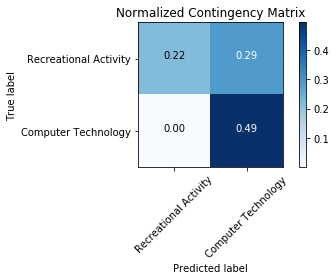

In [14]:
plt.figure()
plot_contingency_matrix(con_matrix, classes=class_names, normalize=True,
                      title='Normalized Contingency Matrix')

plt.show()

Contingency matrix, without normalization
[[1718 2261]
 [   4 3899]]


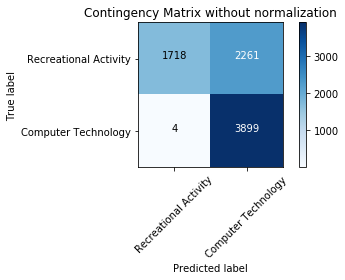

In [15]:
plt.figure()
plot_contingency_matrix(con_matrix, classes=class_names, normalize=False,
                      title='Contingency Matrix without normalization')

plt.show()

# Question3

In [16]:
from sklearn import metrics

In [17]:

print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.bintarget, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(dataset.target, kmeans.labels_))
print("Adjusted Mutual Information Score: %.3f"% metrics.adjusted_mutual_info_score(dataset.target, kmeans.labels_))

Homogeneity: 0.254
Completeness: 0.335
V-measure: 0.289
Adjusted Rand-Index: 0.181
Adjusted Mutual Information Score: 0.254


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# Question4

In [18]:
from sklearn.decomposition import TruncatedSVD

In [19]:

#evar= []
#r=[]
svd = TruncatedSVD(n_components=1000, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)
evar=svd.explained_variance_ratio_.cumsum()
r=np.arange(1,1001)

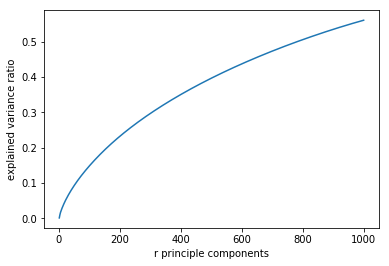

In [20]:
plt.plot(r, evar)
plt.xlabel("r principle components")
plt.ylabel("explained variance ratio")
plt.show()

# Question 5

In [21]:
r_list=[1,2,3,5,10,20,50,100,300]

In [22]:
def svd_kmeans(r):
    svd = TruncatedSVD(n_components=r, random_state=42)
    X_reduced = svd.fit_transform(X_tfidf)
    km = KMeans(n_clusters=2, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km.fit(X_reduced)
    return [metrics.homogeneity_score(dataset.target, km.labels_),metrics.completeness_score(dataset.target, km.labels_),metrics.v_measure_score(dataset.target, km.labels_),metrics.adjusted_rand_score(dataset.target, km.labels_),metrics.adjusted_mutual_info_score(dataset.target, km.labels_)]
    

In [23]:
for r in r_list:
    print(svd_kmeans(r))

F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.00029275270509964866, 0.000297122118721392, 0.00029492122900643043, 0.0003281607588681464, 0.0002012287441842009]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.598474763493921, 0.5991833201422933, 0.5988288322205055, 0.7015437319941075, 0.5984380037305959]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.42015989517782204, 0.45350875094805265, 0.43619784252416827, 0.4255189367833386, 0.4201068091521483]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.22152006534780616, 0.30983180430366425, 0.25833714137938557, 0.1449624767857343, 0.22144878473199087]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.23462501869262953, 0.3212187345416125, 0.2711767512281033, 0.1577989589471987, 0.23455493882118544]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.2362258096799964, 0.3224239716024323, 0.27267481812015293, 0.159619201231275, 0.23615587649433512]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.24162603939083183, 0.32576378989751476, 0.2774565572619094, 0.16679707546182887, 0.2415566011113305]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.2459136851918752, 0.32972145379678475, 0.28171670663624065, 0.17075973241529788, 0.2458446396949744]
[0.24248860014467194, 0.327140669417149, 0.27852460263629775, 0.1667970920946106, 0.24241924081944116]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [24]:
from sklearn.decomposition import NMF
def NMF_kmeans(r):
    model = NMF(n_components=r, init='random', random_state=42)
    W = model.fit_transform(X_tfidf)
    km = KMeans(n_clusters=2, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km.fit(W)
    return [metrics.homogeneity_score(dataset.target, km.labels_),metrics.completeness_score(dataset.target, km.labels_),metrics.v_measure_score(dataset.target, km.labels_),metrics.adjusted_rand_score(dataset.target, km.labels_),metrics.adjusted_mutual_info_score(dataset.target, km.labels_)]
 

In [25]:
measures_svd=[]
measures_NMF=[]
for r in r_list:
    print(r)
    t0 = time()
    measures_svd.append(svd_kmeans(r))    
    print("svd_kmeans for done in %0.3fs" % (time() - t0))
    t0 = time()
    measures_NMF.append(NMF_kmeans(r))
    print("NMF_kmeans for done in %0.3fs" % (time() - t0))

1


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.459s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 2.226s
2


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.666s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 0.914s
3


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.831s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 1.619s
5


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.819s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 2.035s
10


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 1.218s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 4.870s
20


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 1.487s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 14.378s
50


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 3.123s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 32.424s
100


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 5.367s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 150.669s
300


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 14.760s
NMF_kmeans for done in 1377.617s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [44]:
def plot_measure(r_list,score_case,reduced_type):
    y=[]
    if reduced_type==1:
        for i in range(len(r_list)):
            y.append(measures_svd[i][score_case-1])
        #plt.plot(r_list, y)
        plt.plot(y)
        plt.title("Truncated SVD")
    else:
        for i in range(len(r_list)):
            y.append(measures_NMF[i][score_case-1])
        plt.plot(y)#plt.plot(r_list, y)
        plt.title("NMF")
    plt.xlabel("r components")
    plt.xticks([j for j in range(9)],["1","2","5","8","10","20","50","100","300"])   
    if score_case==1:
        plt.ylabel("Homogeneity")
    elif score_case==2:
        plt.ylabel("Completeness")
    elif score_case==3:
        plt.ylabel("V-measure")
    elif score_case==4:
        plt.ylabel("Adjusted Rand-Index")
    elif score_case==5:
        plt.ylabel("Adjusted Mutual Info Score")

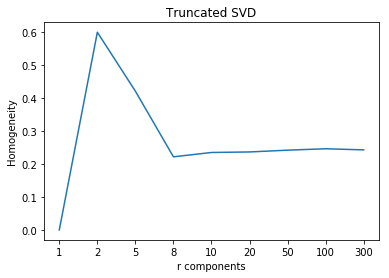

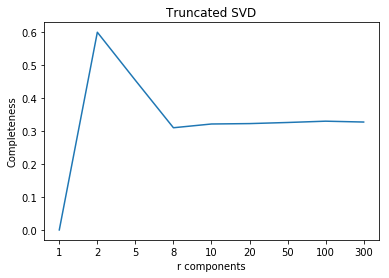

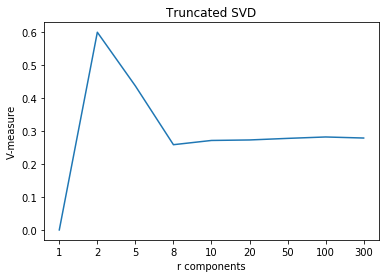

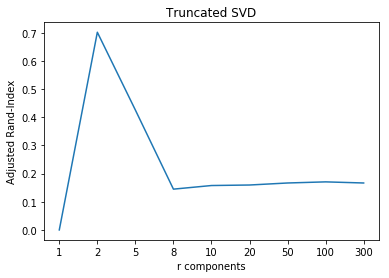

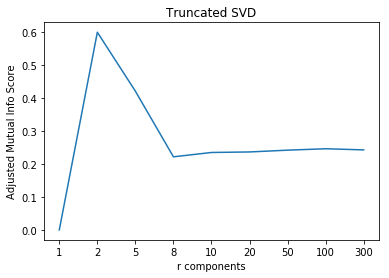

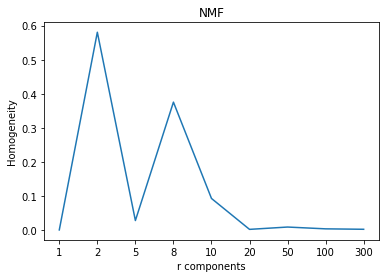

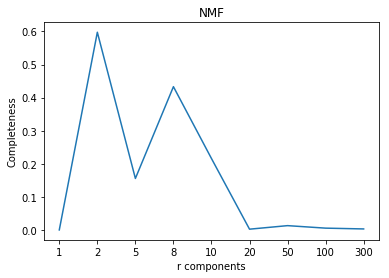

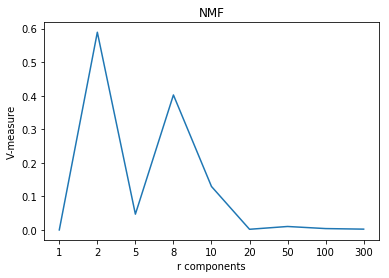

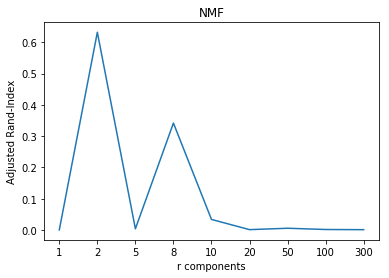

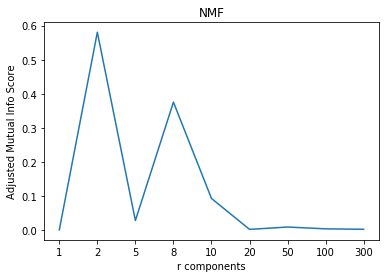

In [45]:
plt.figure();plot_measure(r_list,1,1)
plt.figure();plot_measure(r_list,2,1)
plt.figure();plot_measure(r_list,3,1)
plt.figure();plot_measure(r_list,4,1)
plt.figure();plot_measure(r_list,5,1)
plt.figure();plot_measure(r_list,1,2)
plt.figure();plot_measure(r_list,2,2)
plt.figure();plot_measure(r_list,3,2)
plt.figure();plot_measure(r_list,4,2)
plt.figure();plot_measure(r_list,5,2)
plt.show()

In [28]:
r_svd_best=r_list[1]
r_NMF_best=r_list[1]

# Question 6

# Question 7

In [29]:
def dim_reduced_visualization(svd_NMF,r_best,X_tfidf,n_cluster,dataset):
    if svd_NMF==1:
        svd = TruncatedSVD(n_components=r_best, random_state=42)
        X_vis = svd.fit_transform(X_tfidf)        
        title='(SVD)'
    else:
        model = NMF(n_components=r_best, init='random', random_state=42)
        X_vis = model.fit_transform(X_tfidf)
        title='(NMF)'
    km_vis = KMeans(n_clusters=n_cluster, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km_vis.fit(X_vis) 
    #reduced to 2d
    if r_best>2:
        svd_vis=TruncatedSVD(n_components=2, random_state=42)
        X_vis=svd_vis.fit_transform(X_vis)
        
    plt.figure()
    #color=[]
    #for i in range(X_vis.shape[0]):
        #color.append([0.5*(1-km_vis.labels_[i]),0.5,0.5])
    #plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=0.05*km_vis.labels_)
    title1='Clustering label'+title
    plt.xlabel(title1)
    plt.figure()   
    #color=[]
    #for i in range(X_vis.shape[0]):
        #color.append([0.5*dataset.target[i],0.5,0.5])
    #plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=0.05*dataset.target)
    title1='Ground truth class label'+title
    plt.xlabel(title1)
    plt.show()
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, km_vis.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, km_vis.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, km_vis.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(dataset.target, km_vis.labels_))
    print("Adjusted Mutual Information Score: %.3f"% metrics.adjusted_mutual_info_score(dataset.target, km_vis.labels_))

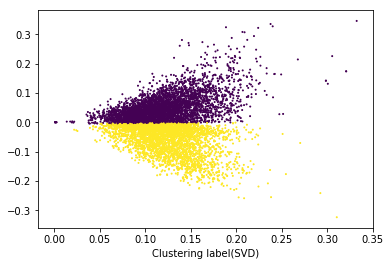

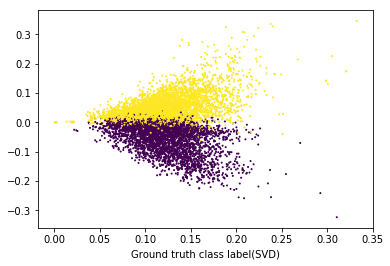

Homogeneity: 0.598
Completeness: 0.599
V-measure: 0.599
Adjusted Rand-Index: 0.702
Adjusted Mutual Information Score: 0.598


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [30]:
dim_reduced_visualization(1,r_svd_best,X_tfidf,2,dataset)

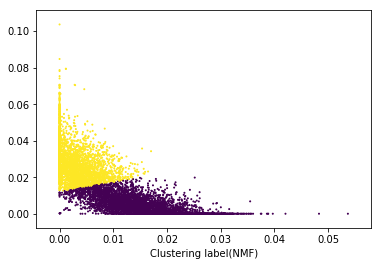

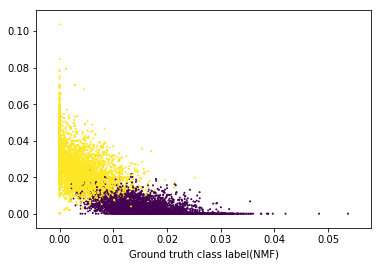

Homogeneity: 0.581
Completeness: 0.598
V-measure: 0.589
Adjusted Rand-Index: 0.632
Adjusted Mutual Information Score: 0.581


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [31]:
dim_reduced_visualization(2,r_NMF_best,X_tfidf,2,dataset)

# Question 8 9 10

In [32]:
def transformation_visualization(svd_NMF,r_best,scal,trans,order,X_tfidf,n_cluster,dataset):
    if svd_NMF==1:
        svd = TruncatedSVD(n_components=r_best, random_state=42)
        X_vis = svd.fit_transform(X_tfidf)         
        title1='(SVD) '
    else:
        model = NMF(n_components=r_best, init='random', random_state=42)
        X_vis = model.fit_transform(X_tfidf)        
        title1='(NMF) '
    if scal==1:
        title2='with scaling features'
        #X_vis=(X_vis-np.mean(X_vis,axis=0, keepdims=True))/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
        X_vis=(X_vis)/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
    if trans==1:
        title2='with transformation features'
        X_vis=np.sign(X_vis)*(np.log(np.sign(X_vis)*X_vis+0.01)-np.log(0.01))
    if order==2:
        title2='transformation and then scaling'
        #X_vis=(X_vis-np.mean(X_vis,axis=0, keepdims=True))/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
        X_vis=(X_vis)/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
    elif order==1:
        title2='scaling and then transformaiton'
    km_vis = KMeans(n_clusters=n_cluster, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km_vis.fit(X_vis)
    #reduced to 2d
    if r_best>2:
        svd_vis=TruncatedSVD(n_components=2, random_state=42)
        X_vis=svd_vis.fit_transform(X_vis)
        
    plt.figure()
    #color=[]
    #for i in range(X_vis.shape[0]):
    #    color.append([0.5*(1-km_vis.labels_[i]),0.5,0.5])
    #plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=0.05*km_vis.labels_)
    title='Clustering label'+title1+title2
    plt.xlabel(title)
    plt.figure()   
    #color=[]
    #for i in range(X_vis.shape[0]):
    #    color.append([0.5*dataset.target[i],0.5,0.5])
    #plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)    
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=0.05*dataset.target)
    title='Ground truth class label'+title1+title2
    plt.xlabel(title)
    plt.show()
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, km_vis.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, km_vis.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, km_vis.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(dataset.target, km_vis.labels_))
    print("Adjusted Mutual Information Score: %.3f"% metrics.adjusted_mutual_info_score(dataset.target, km_vis.labels_))

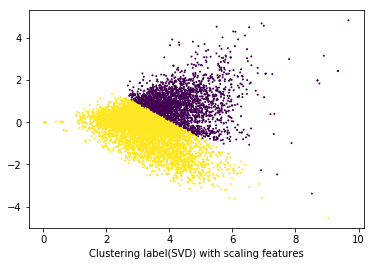

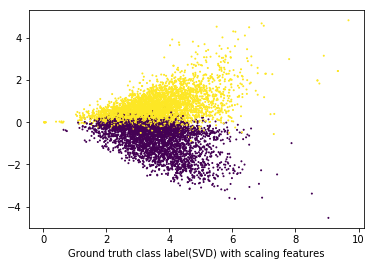

Homogeneity: 0.235
Completeness: 0.263
V-measure: 0.248
Adjusted Rand-Index: 0.255
Adjusted Mutual Information Score: 0.235


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


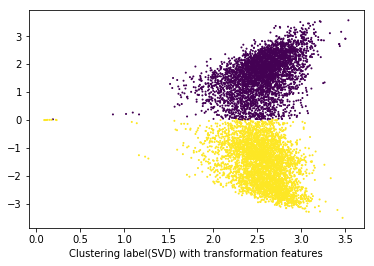

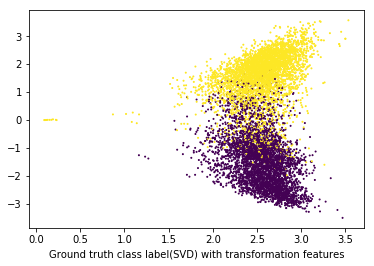

Homogeneity: 0.602
Completeness: 0.602
V-measure: 0.602
Adjusted Rand-Index: 0.710
Adjusted Mutual Information Score: 0.602


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


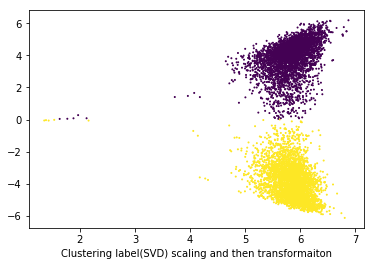

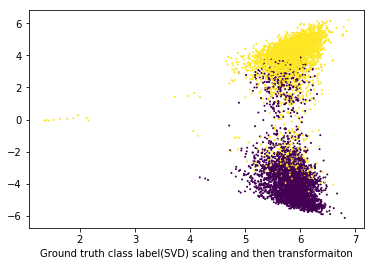

Homogeneity: 0.604
Completeness: 0.604
V-measure: 0.604
Adjusted Rand-Index: 0.711
Adjusted Mutual Information Score: 0.604


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


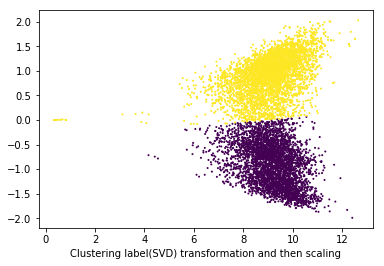

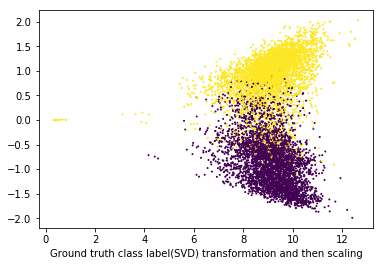

Homogeneity: 0.606
Completeness: 0.606
V-measure: 0.606
Adjusted Rand-Index: 0.713
Adjusted Mutual Information Score: 0.605


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


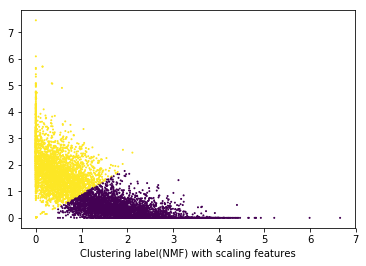

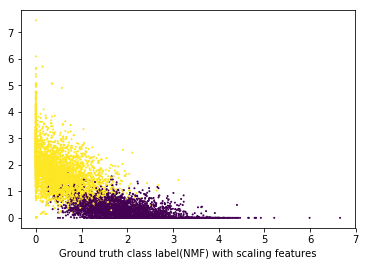

Homogeneity: 0.683
Completeness: 0.686
V-measure: 0.684
Adjusted Rand-Index: 0.773
Adjusted Mutual Information Score: 0.683


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


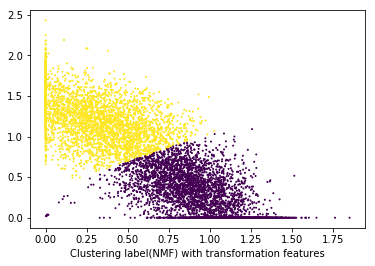

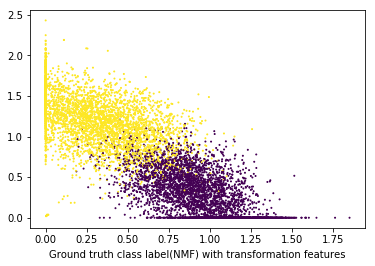

Homogeneity: 0.701
Completeness: 0.702
V-measure: 0.701
Adjusted Rand-Index: 0.796
Adjusted Mutual Information Score: 0.701


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


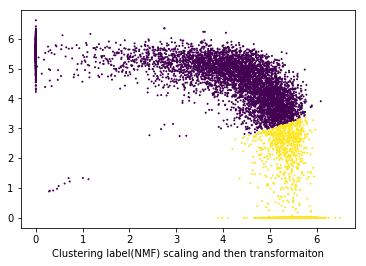

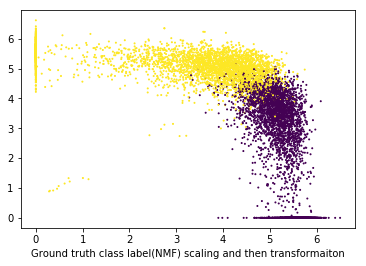

Homogeneity: 0.313
Completeness: 0.383
V-measure: 0.344
Adjusted Rand-Index: 0.249
Adjusted Mutual Information Score: 0.313


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


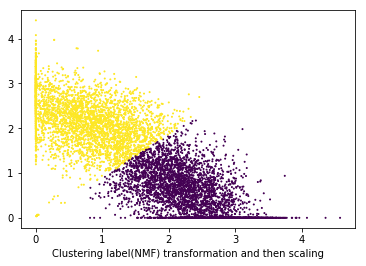

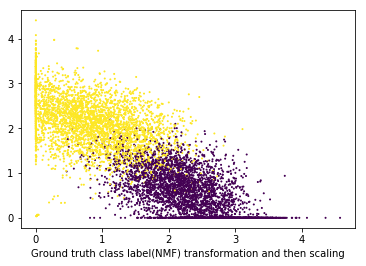

Homogeneity: 0.704
Completeness: 0.705
V-measure: 0.704
Adjusted Rand-Index: 0.799
Adjusted Mutual Information Score: 0.704


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [33]:
transformation_visualization(1,r_svd_best,1,0,0,X_tfidf,2,dataset)
transformation_visualization(1,r_svd_best,0,1,0,X_tfidf,2,dataset)
transformation_visualization(1,r_svd_best,1,1,1,X_tfidf,2,dataset)
transformation_visualization(1,r_svd_best,0,1,2,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,1,0,0,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,0,1,0,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,1,1,1,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,0,1,2,X_tfidf,2,dataset)

# Question 11 12

In [34]:
Alldataset = fetch_20newsgroups(subset='all', categories=None,shuffle=True, random_state=42)

In [35]:
vectorizer = CountVectorizer(min_df=3,stop_words='english')
# fit_tranform train data
X_all_counts = vectorizer.fit_transform(Alldataset.data)
print(" X_all_count size ", X_all_counts.shape)
tfidf_transformer_all = TfidfTransformer()
# fit_tranform data
X_all_tfidf = tfidf_transformer_all.fit_transform(X_all_counts)
print(X_all_tfidf.shape)

 X_all_count size  (18846, 52295)
(18846, 52295)


In [36]:
svd = TruncatedSVD(n_components=20, random_state=42)
X_vis = svd.fit_transform(X_all_tfidf)
print(X_vis.shape)

(18846, 20)


In [ ]:
# plot contingency matrix

import itertools
def plot_contingency_matrix_20(cm,
                          title='Contingency matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the contingency matrix.
    Normalization can be applied by setting normalize=True.
    """

    print('Contingency matrix')
#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=4,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout() 
    plt.tight_layout()
    
    plt.savefig("contingency",dpi=500)

2


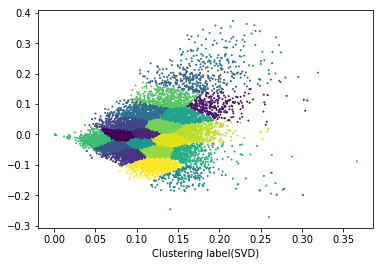

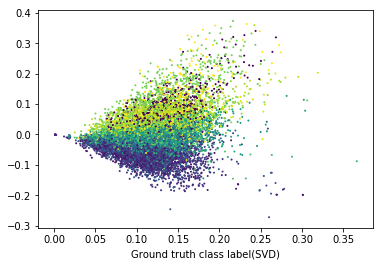

Homogeneity: 0.210
Completeness: 0.222
V-measure: 0.216
Adjusted Rand-Index: 0.065
Adjusted Mutual Information Score: 0.207
3


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


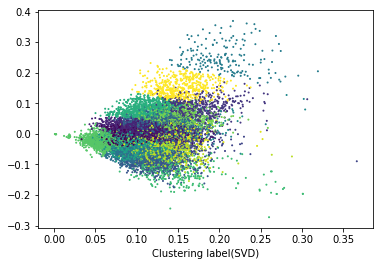

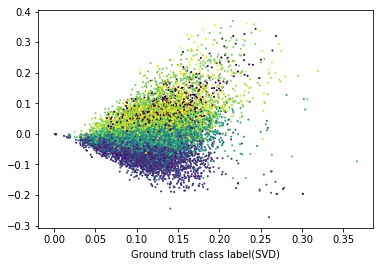

Homogeneity: 0.233
Completeness: 0.243
V-measure: 0.238
Adjusted Rand-Index: 0.080
Adjusted Mutual Information Score: 0.231
5


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


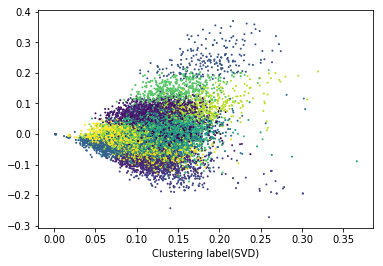

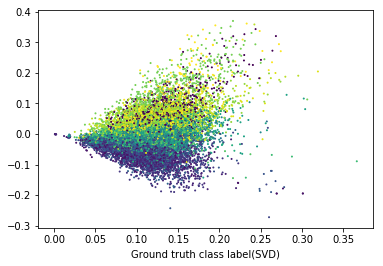

Homogeneity: 0.314
Completeness: 0.334
V-measure: 0.324
Adjusted Rand-Index: 0.124
Adjusted Mutual Information Score: 0.312
10


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


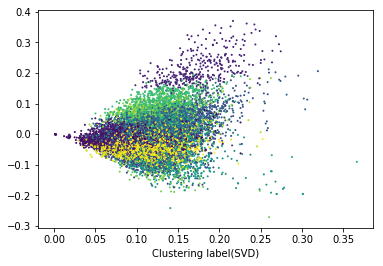

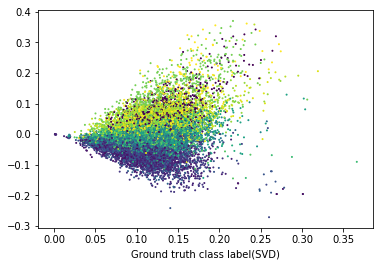

Homogeneity: 0.338
Completeness: 0.379
V-measure: 0.358
Adjusted Rand-Index: 0.137
Adjusted Mutual Information Score: 0.336
20


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


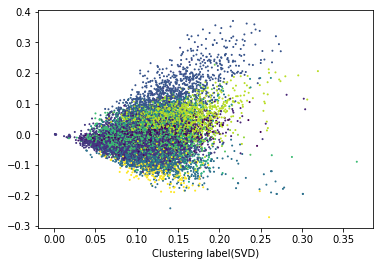

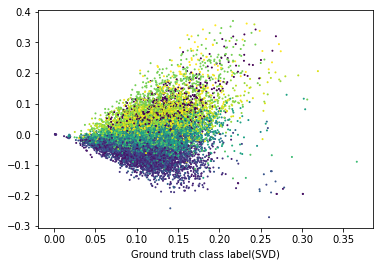

Homogeneity: 0.288
Completeness: 0.383
V-measure: 0.329
Adjusted Rand-Index: 0.093
Adjusted Mutual Information Score: 0.286
50


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


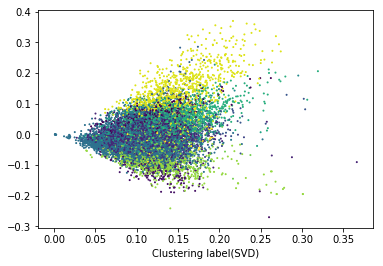

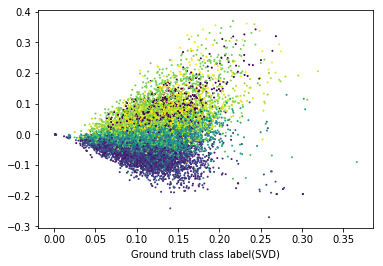

Homogeneity: 0.294
Completeness: 0.416
V-measure: 0.345
Adjusted Rand-Index: 0.089
Adjusted Mutual Information Score: 0.292
100


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


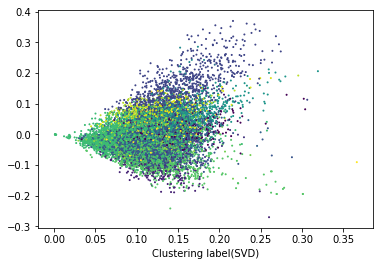

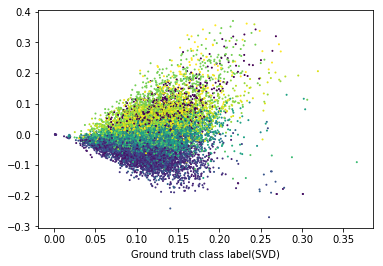

Homogeneity: 0.276
Completeness: 0.377
V-measure: 0.319
Adjusted Rand-Index: 0.079
Adjusted Mutual Information Score: 0.273
300


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


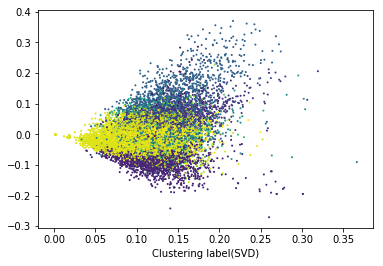

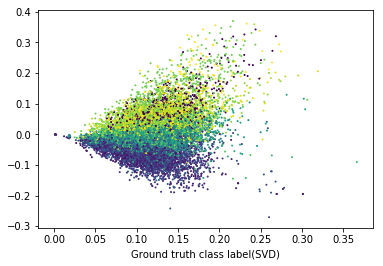

Homogeneity: 0.301
Completeness: 0.466
V-measure: 0.366
Adjusted Rand-Index: 0.074
Adjusted Mutual Information Score: 0.299


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [37]:
r_list1=[2, 3, 5, 10, 20, 50, 100, 300]
for r in r_list1:
    print(r)
    dim_reduced_visualization(1,r,X_all_tfidf,20,Alldataset)

2


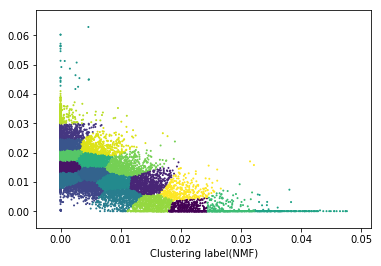

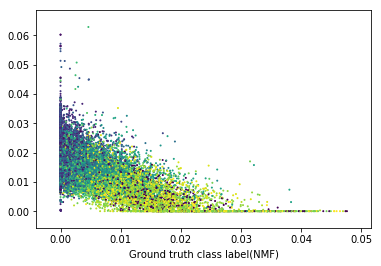

Homogeneity: 0.167
Completeness: 0.179
V-measure: 0.173
Adjusted Rand-Index: 0.048
Adjusted Mutual Information Score: 0.164
3


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


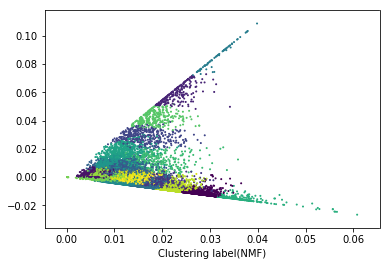

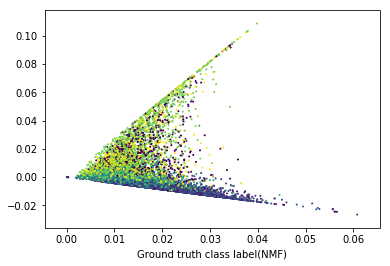

Homogeneity: 0.202
Completeness: 0.218
V-measure: 0.210
Adjusted Rand-Index: 0.062
Adjusted Mutual Information Score: 0.199
5


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


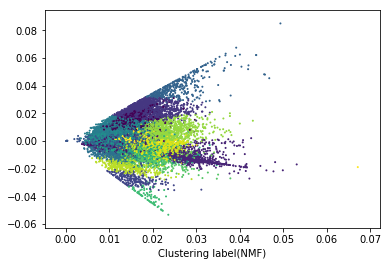

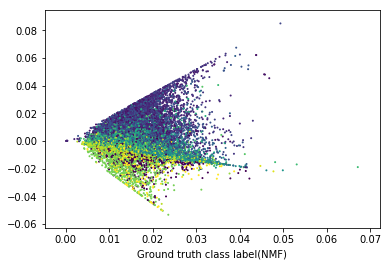

Homogeneity: 0.249
Completeness: 0.265
V-measure: 0.256
Adjusted Rand-Index: 0.086
Adjusted Mutual Information Score: 0.246
10


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


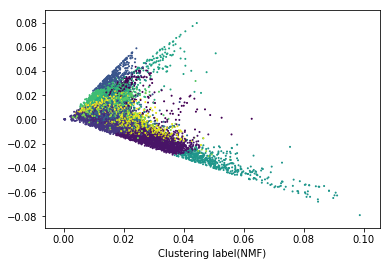

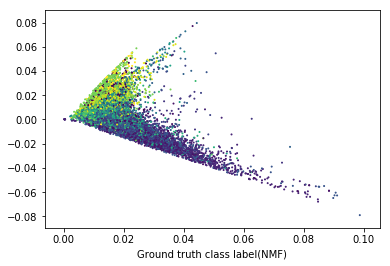

Homogeneity: 0.313
Completeness: 0.352
V-measure: 0.331
Adjusted Rand-Index: 0.124
Adjusted Mutual Information Score: 0.311
20


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


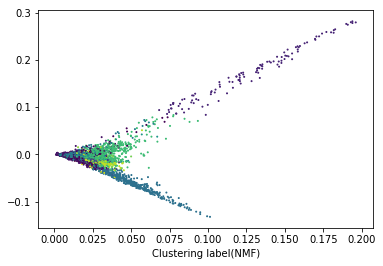

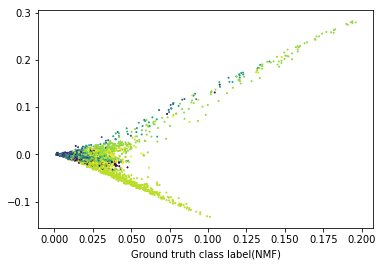

Homogeneity: 0.268
Completeness: 0.355
V-measure: 0.306
Adjusted Rand-Index: 0.096
Adjusted Mutual Information Score: 0.266
50


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


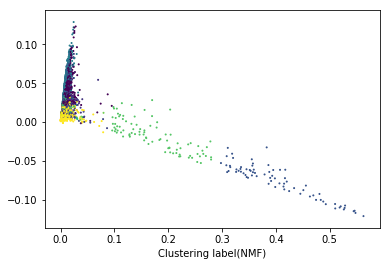

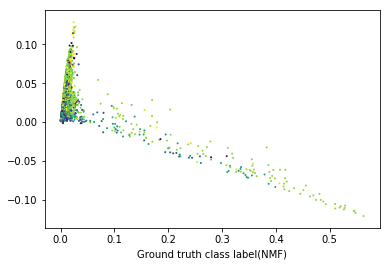

Homogeneity: 0.169
Completeness: 0.245
V-measure: 0.200
Adjusted Rand-Index: 0.037
Adjusted Mutual Information Score: 0.166
100


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


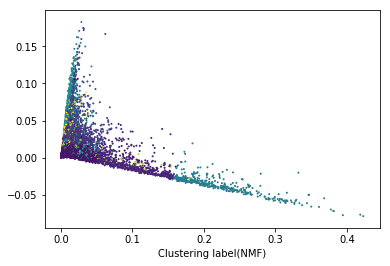

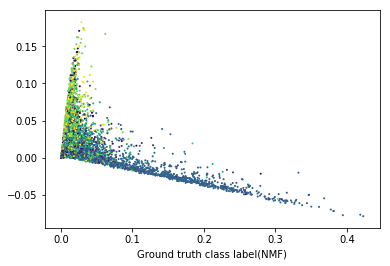

Homogeneity: 0.181
Completeness: 0.294
V-measure: 0.224
Adjusted Rand-Index: 0.036
Adjusted Mutual Information Score: 0.179
300


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


KeyboardInterrupt: 

In [38]:
for r in r_list1:
    print(r)
    dim_reduced_visualization(2,r,X_all_tfidf,20,Alldataset)

In [ ]:
#r_svd_best1=10
#r_NMF_best1=10

In [ ]:
# transformation_visualization(1,r_svd_best1,1,0,0,X_all_tfidf,20,Alldataset)
# transformation_visualization(1,r_svd_best1,0,1,0,X_all_tfidf,20,Alldataset)
# transformation_visualization(1,r_svd_best1,1,1,1,X_all_tfidf,20,Alldataset)
# transformation_visualization(1,r_svd_best1,0,1,2,X_all_tfidf,20,Alldataset)
# transformation_visualization(2,r_NMF_best1,1,0,0,X_all_tfidf,20,Alldataset)
# transformation_visualization(2,r_NMF_best1,0,1,0,X_all_tfidf,20,Alldataset)
# transformation_visualization(2,r_NMF_best1,1,1,1,X_all_tfidf,20,Alldataset)
# transformation_visualization(2,r_NMF_best1,0,1,2,X_all_tfidf,20,Alldataset)

In [ ]:
# r_svd_best1=100
# r_NMF_best1=100

In [ ]:
# transformation_visualization(1,r_svd_best1,1,0,0,X_all_tfidf,20,Alldataset)
# transformation_visualization(1,r_svd_best1,0,1,0,X_all_tfidf,20,Alldataset)
# transformation_visualization(1,r_svd_best1,1,1,1,X_all_tfidf,20,Alldataset)
# transformation_visualization(1,r_svd_best1,0,1,2,X_all_tfidf,20,Alldataset)

In [ ]:
# t0 = time()
# model = NMF(n_components=r_NMF_best1, init='random', random_state=42)
# X_vis_in = model.fit_transform(X_all_tfidf)
# print("done in %0.3fs" % (time() - t0))

In [ ]:
def transformation_visualization_NMF(r_best,scal,trans,order,X_vis_in,n_cluster,dataset):
    title1='(NMF) '
    X_vis=X_vis_in
    if scal==1:
        title2='with scaling features'
        #X_vis=(X_vis-np.mean(X_vis,axis=0, keepdims=True))/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
        X_vis=(X_vis)/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
    if trans==1:
        title2='with transformation features'
        X_vis=np.sign(X_vis)*(np.log(np.sign(X_vis)*X_vis+0.01)-np.log(0.01))
    if order==2:
        title2='transformation and then scaling'
        #X_vis=(X_vis-np.mean(X_vis,axis=0, keepdims=True))/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
        X_vis=(X_vis)/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
    elif order==1:
        title2='scaling and then transformaiton'
    km_vis = KMeans(n_clusters=n_cluster, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km_vis.fit(X_vis)
    #reduced to 2d
    if r_best>2:
        svd_vis=TruncatedSVD(n_components=2, random_state=42)
        X_vis=svd_vis.fit_transform(X_vis)
        
    plt.figure()
    #color=[]
    #for i in range(X_vis.shape[0]):
    #    color.append([0.5*(1-km_vis.labels_[i]),0.5,0.5])
    #plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=0.05*km_vis.labels_)
    title='Clustering label'+title1+title2
    plt.xlabel(title)
    plt.figure()   
    #color=[]
    #for i in range(X_vis.shape[0]):
    #    color.append([0.5*dataset.target[i],0.5,0.5])
    #plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)    
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=0.05*dataset.target)
    title='Ground truth class label'+title1+title2
    plt.xlabel(title)
    plt.show()
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, km_vis.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, km_vis.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, km_vis.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(dataset.target, km_vis.labels_))
    print("Adjusted Mutual Information Score: %.3f"% metrics.adjusted_mutual_info_score(dataset.target, km_vis.labels_))

In [ ]:
# transformation_visualization_NMF(r_NMF_best1,1,0,0,X_vis_in,20,Alldataset)
# transformation_visualization_NMF(r_NMF_best1,0,1,0,X_vis_in,20,Alldataset)
# transformation_visualization_NMF(r_NMF_best1,1,1,1,X_vis_in,20,Alldataset)
# transformation_visualization_NMF(r_NMF_best1,0,1,2,X_vis_in,20,Alldataset)

In [ ]:
for r in r_list1:
    print(r)
    transformation_visualization(1,r,1,0,0,X_all_tfidf,20,Alldataset)
    transformation_visualization(1,r,0,1,0,X_all_tfidf,20,Alldataset)
    transformation_visualization(1,r,1,1,1,X_all_tfidf,20,Alldataset)
    transformation_visualization(1,r,0,1,2,X_all_tfidf,20,Alldataset)
    t0 = time()
    model = NMF(n_components=r, init='random', random_state=42)
    X_vis_in = model.fit_transform(X_all_tfidf)
    print("done in %0.3fs" % (time() - t0))
    transformation_visualization_NMF(r,1,0,0,X_vis_in,20,Alldataset)
    transformation_visualization_NMF(r,0,1,0,X_vis_in,20,Alldataset)
    transformation_visualization_NMF(r,1,1,1,X_vis_in,20,Alldataset)
    transformation_visualization_NMF(r,0,1,2,X_vis_in,20,Alldataset)